## Introduction
This tutorial will introduce some basic computer vision processes focused on images. While humans see the world through their two eyes and the visible light spectrum, computers just see binary represented as an image format. So the high level goal in computer vision is to obtain a high-level understanding of images and video. Computer vision is used for a wide range of applications and disciplines. Object detection, image segmentation, facial recognition, and path reconstruction are among the most common applications in the real world.

## Tutorial Content
To give this introductory tutorial on computer vision techniques, we will use the open source library [OpenCV](https://opencv.org/). This is perhaps the most commonly used computer vision library supporting a variety of languages (Python, C++, Java, and others) and providing a number of algorithms across a number of domains.

We will use a subset of the data from the [MNIST handwritten digits database](http://yann.lecun.com/exdb/mnist/) to build a classifier for digits. This is a very well-known database for training and testing in machine learning. We use this library rather than some other well-known image classification libraries, primarily because each image is relatively small (28x28 originally but resized to 20x20), so it won't take too long to run end-to-end.

## Installing the libraries
Although C++ is the most commonly used programming language for OpenCV (primarily because of performance), the Python version is perhaps the easiest to use and learn some basic techniques. OpenCV's most recent stable release is version 4.1.1, while older stable versions (namely 3.4.7 and 2.4.13) are still used by many users. The differences between OpenCV version 3.* and 4.* can be summarized [here](https://opencv.org/opencv-4-0/) if you are interested, but shouldn't be important for the purpose of this tutorial.

You can install OpenCV using `pip`

`$ pip3 install opencv-python`

After which, you may need to install some additional libraries by running

`$ apt-get update`

`$ apt-get install -y libsm6 libxext6 libxrender-dev`

You can check the installation by running

`import cv2`

`print(cv2.__version__)`


which should output something like
`4.1.1`

## Loading images
Let's start out by loading a color image:

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('mountain.jpg')

Here we use [imread](https://docs.opencv.org/4.1.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) to load an image file to an "image" variable. In the case of color images, the decoded images are stored in Blue Green Red order.

In a typical Python program (and other OpenCV supported languages), the image could easily be displayed using OpenCV's built-in [imshow](https://docs.opencv.org/4.1.1/df/d24/group__highgui__opengl.html#gaae7e90aa3415c68dba22a5ff2cefc25d) function that creates a new window to show the image. However, given that we are using jupyter notebook, this function can cause the kernel to crash. To show the image, we use matplotlib's [pyplot](https://matplotlib.org/api/pyplot_api.html) to show the image.

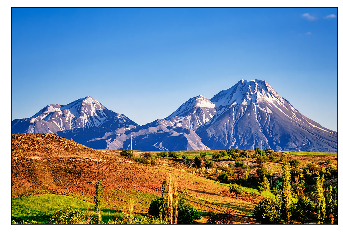

In [2]:
# since opencv loads images in BGR format by default, we need to convert it to RGB to show properly
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.xticks([]), plt.yticks([]) # to hide tick marks, which typically aren't useful
plt.imshow(img_rgb)
plt.show()

Let's define a simple helper function for future viewing of images:

In [3]:
def show_img(image):
    plt.xticks([]), plt.yticks([])
    plt.imshow(image)
    plt.show()

We can also load and view the image using grayscale:

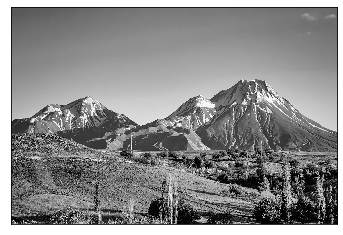

In [4]:
img_gray = cv2.imread('mountain.jpg', 0) # specifying a second argument of 0 loads the image in grayscale
plt.imshow(img_gray, cmap = 'gray')      # showing the image in grayscale requires altering the colormap
plt.xticks([]), plt.yticks([])
plt.show()

Pixel values can be accessed/modified by row and column coordinates. For color (BGR) images, an array of the corresponding Blue, Green, Red values are given. For a gray image, only the intensity is returned.

In [5]:
# Accessing image's pixel values
pix_color_arr = img[388,388] # 3x1 array, pixel at (388,388)
print("Blue, Green, Red, of pixel at (388,388): %s" % pix_color_arr)

pix_gray = img_gray[388,388] # scalar, intensity at (388, 388)
print("Intensity of pixel at (388, 388)" % pix_gray)

# Modifying image's pixel values
img[388, 388] = [255,0,255]
print("Blue, Green, Red, of pixel at (388,388): %s" % img[388,388])

Blue, Green, Red, of pixel at (388,388): [229 183 135]
Intensity of pixel at (388, 388)
Blue, Green, Red, of pixel at (388,388): [255   0 255]


Finally, getting the image's dimensions and other features is important for certain image operations and transformations.

In [6]:
print("Color image's shape: %s" % (img.shape,)) # outputs the (# rows, # cols, # color channels if color img)
print("Gray image's shape: %s" % (img_gray.shape,))

print("Color image's size: %s" % img.size) # total number of pixels
print("Gray image's size: %s" % img_gray.size)

print("Color image's datatype %s" % img.dtype) # datatype of image is very important for debugging some type-specific errors in certain algorithms
print("Gray image's datatype %s" % img_gray.dtype)

Color image's shape: (1067, 1600, 3)
Gray image's shape: (1067, 1600)
Color image's size: 5121600
Gray image's size: 1707200
Color image's datatype uint8
Gray image's datatype uint8


## Image Processing
OpenCV provides a number of ways to transform certain components of images. One simple processing technique is filtering for basic noise reduction. We can accomplish this through two common methods:
* [Averaging](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#filter2d)- add all pixels in a block, take its average and replace central pixel with new average value
    ![Averaging](averaging.png)
This can be done in OpenCV as follows for a 15x15 block:

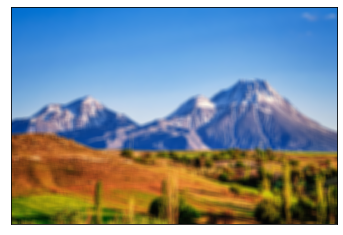

In [7]:
avg_matrix = np.ones((25,25), np.float32) / 625
avg_img = cv2.filter2D(img_rgb, -1, avg_matrix)
show_img(avg_img)

* [Gaussian blurring](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#gaussianblur)- convolve each pixel in a block with a Gaussian kernel and sum each multiplication to get the pixel
    ![Gaussian Blur Kernel](gaussian_blur_kernel.png)
    * Generally, it's preferred to use gaussian blurring as opposed to averaging since it has more natural blurring and less artifacts around blocks

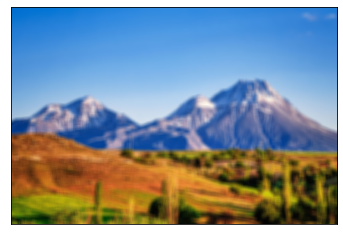

In [8]:
blurred_img = cv2.GaussianBlur(img_rgb,(25,25), 20)
show_img(blurred_img)

Varying the size of the Gaussian kernel and the standard deviation can also impact the level of blur. Higher standard deviations lead to more dramatic blurring and noise reduction at the cost of detail.

Stdev=5


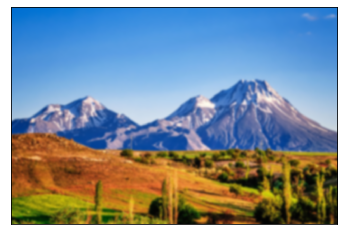

Stdev=15


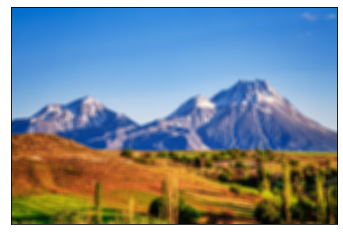

Stdev=50


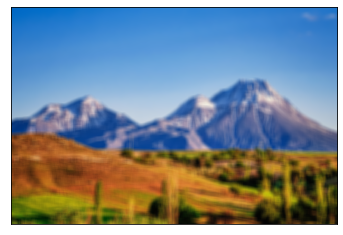

In [9]:
print("Stdev=5")
blurred_img = cv2.GaussianBlur(img_rgb,(25,25), 5)
show_img(blurred_img)

print("Stdev=15")
blurred_img = cv2.GaussianBlur(img_rgb,(25,25), 15)
show_img(blurred_img)

print("Stdev=50")
blurred_img = cv2.GaussianBlur(img_rgb,(25,25), 50)
show_img(blurred_img)

## Image Classification Process
In the process of image classification, the key steps are to:
1. Obtain input image
2. Apply preprocessing procedure(s)
3. Extract "features" (e.g. HOG)
4. Use learning algorithm on extracted features (e.g. SVM, CNN, Random Forests)
5. Assign label assignment

## Loading Our Data
We first load the digit data into a numpy array. This subset of the MNIST data has just 500 images for each digit type. Once we load the image, we follow a procedure to effectively refine the edges of the image by first blurring/smoothing the image slightly and then subtracting the smoothed image from the original image. More details on this procedure can be found [here](https://en.wikipedia.org/wiki/Unsharp_masking#Digital_unsharp_masking) and more info on how this is implemented in OpenCV can be found [here](https://stackoverflow.com/questions/4993082/how-to-sharpen-an-image-in-opencv).

This cell may take a few minutes to load all the images and perform the preprocessing procedures.

In [10]:
# digits loaded in numerical order (0's then 1's and so on)
digits = []
for digit in range(10):
    for img_num in range(500):
        file_name = "./digits/" + str(digit) + "/" + str(img_num) + ".png"
        orig_img = cv2.imread(file_name, 0)
        blurred_img = cv2.GaussianBlur(orig_img,(3,3), 2)  # Step 1 of "edge refining": blurring
        digits.append(cv2.addWeighted(blurred_img, 0.5, orig_img, -0.5, 0)) # Step 2: subtract blurred image from original
digits = np.array(digits)

# labels follow the same numerical order as the images
labels = np.repeat(np.arange(10), len(digits) / 10) # 10 digit types we are classifying

Since the data (both testing and training) is stored in sorted numerical order in one array, we shuffle the data for the later splitting into training and testing. This step is unnecessary if your data is already split into a training and testing dataset. Shuffling both the digits and label arrays in Python follows the procedure given [here](https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison).

In [11]:
# randomize data for splitting into training and test dataset
perm = np.random.permutation(len(digits))
digits, labels = digits[perm], labels[perm]

## Getting Image Features
Image features are a representation of information within a given image. They can range in complexity from a single pixel to "corners" and "edges". 

The benefit of representing images using features is we can filter out unnecessary details and save space; however, we may lose differentiating information. It's also important to note that features are not always intuitive as certain algorithms (e.g. CNNs) can create their own feature representations.

In this tutorial, we will detail one such representation called [Histogram of Oriented Gradients (HOG)](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients). This describes local object appearance and shape through a distribution of intensity gradients (edge directions).

So how does HOG work?
1. Gradient calculation by passing the following 1D filter kernels in both the x and y direction for every pixel
![HOG Step 1](hog_step1.png)
2. Divide a detection window into a 'cell' grid
3. Produce a histogram of gradients for each of these cells
![HOG Step 3](hog_step3.png)
![HOG Step 3 Histogram](hog_step3_histogram.png)
(Image from: *Applying Computer Vision for Monitoring Visitor Numbers - A Geographical Approach - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Histogramms-of-Oriented-Gradients-Own-arrangement-based-on-Mallick-2016_fig13_320948063 [accessed 16 Oct, 2019]*)
4. Normalize the blocks (section of cells) for contrast
![HOG Step 4](hog_step4.png)
5. Create a list of these vectors to complete our feature representation
![HOG Step 5](hog_step5.png)



In OpenCV, creating this feature descriptor is not too hard using the [HOGDescriptor](https://docs.opencv.org/master/d5/d33/structcv_1_1HOGDescriptor.html#a5c8e8ce0578512fe80493ed3ed88ca83) class. The only annoying part is that if we don't use the default values for the constructor, we have to define the HOGDescriptor for every other value.

In [12]:
winSize = (20,20) # image size is 20x20 so default window size needs adjusted
blockSize = (8,8) # arbitrarily chosen to be 8x8
blockStride = (4,4) # should be less than block size
nbins = 9 # number of bins in our histogram
signedGradient = True # gradient direction matters for digits

# Creating the HOG descriptor requires using just all defaults or specifying every value
# All other values are just set to their defaults
hog_descriptor = cv2.HOGDescriptor(winSize, blockSize, blockStride, (8,8), nbins, 1, -1, 0, 0.2, 1, 64, signedGradient)

With this `HOGDescriptor`, we can simply call `.compute(img)` to get the feature descriptor for img.

In [13]:
hog_descriptors = []
for digit_img in digits:
    hog_descriptors.append(hog_descriptor.compute(digit_img))
hog_descriptors = np.squeeze(hog_descriptors) # to remove outler list

Now that we have extracted the HOG descriptor's for all of the images, we need to use a learning algorithm to classify the images.

In [14]:
# choose 90% of data to be used for training, remaining 10% for testing
training_set_size = int(0.9 * len(hog_descriptors))
hog_descriptors_train, hog_descriptors_test = np.split(hog_descriptors, [training_set_size])
labels_train, labels_test = np.split(labels, [training_set_size])

## Machine Learning Using OpenCV
OpenCV provides a variety a number of machine learning [classes](https://docs.opencv.org/master/dd/ded/group__ml.html) that can be used to classify image feature data. In this tutorial, we will use OpenCV's [SVM](https://docs.opencv.org/master/d1/d2d/classcv_1_1ml_1_1SVM.html) implementation.

The SVM class allows for a lot of customization. The key points a user will usually need to customize are:
* [type](https://docs.opencv.org/master/d1/d2d/classcv_1_1ml_1_1SVM.html#ab4b93a4c42bbe213ffd9fb3832c6c44f)
    * Here we use the default value of C_SVC, which is used for n-class classification that are not entirely linearly separable.
    * This allows us to apply a penalty outlier multiplier, C, for data points in the wrong decision boundary
* [kernal type](https://docs.opencv.org/master/d1/d2d/classcv_1_1ml_1_1SVM.html#aad7f1aaccced3c33bb256640910a0e56)
    * Kernel types/functions allow us to increase the dimensionality of our data
    * Here we use the non-linear radial basis function ([RBF](http://www.datasciencecourse.org/slides/nonlinear_modeling.pdf#page=41)) which takes gamma as a parameter
* [penalty multiplier](https://docs.opencv.org/master/d1/d2d/classcv_1_1ml_1_1SVM.html#a32d2e8d21aaa4f58cdf9c27c102becf3a8eafc49ef685613b37e1b96351fd2bd1) (C)
    * Specifies the penalty value for outlier values
* [parameter for the kernel function](https://docs.opencv.org/master/d1/d2d/classcv_1_1ml_1_1SVM.html#a32d2e8d21aaa4f58cdf9c27c102becf3a9b81805a0cd06dc59c354b0ad6fc9e9a) (Gamma)
    * Parameter used for our chosen kernel function

In [15]:
model = cv2.ml.SVM_create() # create the SVM Model, default type is C_SVC, so don't need to specify
model.setKernel(cv2.ml.SVM_RBF)
model.setC(5)
model.setGamma(0.5)

Next we train the SVM model using the `train(training_data, sample_type, training_data_labels)` method. The sample type specifies whether each training sample is a row of samples (ROW_SAMPLE) or occuipes a column of samples (COL_SAMPLE).

In [16]:
model.train(hog_descriptors_train, cv2.ml.ROW_SAMPLE, labels_train)

True

Now to obtain the test results, we can call the [predict()](https://docs.opencv.org/master/db/d7d/classcv_1_1ml_1_1StatModel.html#a1a7e49e1febd10392452727498771bc1) method with our SVM model. predict() will output a tuple of the return value (float) and an np array of the predicted digits (as singleton arrays).

In [17]:
_, digit_predictions_unflattened = model.predict(hog_descriptors_test)
digit_predictions = digit_predictions_unflattened.flatten()

accuracy = (labels_test == digit_predictions).mean() * 100
print('Overall Accuracy: %.2f' % accuracy)

Overall Accuracy: 98.60


We can see that our overall accuracy is pretty high. The given data, handwritten digits, is one of the easier domains for computer vision and machine learning algorithms. Digits have limited variation within the same class and notable differences between classes. For more complicated datasets (e.g. [ImageNet](http://www.image-net.org/) for general image classifation and [Places](http://places.csail.mit.edu/) for scene recognition), the above algorithm and feature descriptor may not be suitable.

Below we show a "confusion matrix", which is a common way to better understand how our algorithm classifies the test data. Along the x-axis, are the actual labels and along the y-axis are the predicted labels by our algorithm. So indices along the diagonal (x index == y index) are correctly classified. Other indices (x, y) can be interpreted as having actual label of x and predicted label of y.

In [18]:
confusion_matrix = np.zeros((10, 10), np.int32)
for label, prediction in zip(digit_predictions, labels_test):
    confusion_matrix[int(label), int(prediction)] += 1

import pandas as pd
digit_labels = [_ for _ in '0123456789']
confusion_matrix_df = pd.DataFrame(confusion_matrix, index=digit_labels, columns=digit_labels)
print("Confusion Matrix (Actual Digit vs. Predicted Digit)\n\n%s" % confusion_matrix_df)

Confusion Matrix (Actual Digit vs. Predicted Digit)

    0   1   2   3   4   5   6   7   8   9
0  57   0   0   0   0   0   1   0   0   0
1   0  60   0   0   0   0   0   1   1   0
2   0   0  43   1   0   0   0   0   0   0
3   0   0   0  45   0   0   0   0   0   0
4   0   0   0   0  50   0   0   0   0   0
5   0   0   0   0   0  48   0   0   0   0
6   0   0   0   0   0   0  55   0   0   0
7   0   0   0   0   0   0   0  43   0   1
8   0   0   0   1   0   0   0   0  53   0
9   0   0   0   0   0   1   0   0   0  39


To discuss more about HOG as a feature descriptor, it's main advantages are:
* Fast
* Good at object comparison in practice
* Robust against translation and illumination (via normalization and preprocessing procedures)
* Can be visualized (which may be helpful for adjusting parameters)

However, HOG has several significant disadvantages:
* Very scale-dependent
* Rotation-dependent
* Sensitive to cluttered backgrounds

Rotation and viewpoint is greatly dependent on the gradient angle, so slight variations can cause different histograms and thus feature representations.
Regarding the scalability problems, we can use multiple windows with different sizes at the cost of speed.

More information regarding features and common algorithms implemented in OpenCV can be found [here](https://docs.opencv.org/4.1.2/db/d27/tutorial_py_table_of_contents_feature2d.html).

## Summary and Resources
This tutorial showcased some common computer vision procedures and algorithms using OpenCV. Many other guides on computer vision and OpenCV can be found [here](https://docs.opencv.org/master/d9/df8/tutorial_root.html). Additionally, students at CMU can take a computer vision course such as [16-385](http://www.cs.cmu.edu/~16385/) for undergrads and [16720](http://ci2cv.net/16720b/) for graduate students for more in-depth learning.